# Challenge 1: Data Exploration.

In [39]:
import pandas as pd
from sklearn import preprocessing
from sklearn import feature_selection as fs
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import math

C:\Users\NESTO TECH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [105]:
trainData = pd.read_csv('AdvWorksCusts.csv')
salesData = pd.read_csv('AW_AveMonthSpend.csv')
bikeBuyDate = pd.read_csv('AW_BikeBuyer.csv')
testData = pd.read_csv('AW_test.csv')

In [46]:
trainData.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [43]:
testData.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [25]:
salesData.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [26]:
bikeBuyDate.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [106]:
def nullValues(df):
    vals = {}
    for column in df.columns.tolist():
        vals[column] = df[column].isnull().sum()
    return vals
#nullValues( demoData)

def drop_dul(dfs):
    for df in dfs:
        df.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
        
def count_val(df, cols):
    val= {}
    for col in cols:
        val[col] = df.groupby(col)[col].count().size
    return val
to_clear = ['AddressLine2','MiddleName','Suffix', 'Title','FirstName','LastName','PhoneNumber','AddressLine1','StateProvinceName', 'City','PostalCode']       
trainData.drop(columns=to_clear, inplace = True)
testData.drop(columns=to_clear, inplace = True)

dfs = [trainData, salesData, bikeBuyDate]
drop_dul(dfs)
trainData = trainData.sort_values(by='CustomerID', ascending=True).merge(salesData, on= 'CustomerID')\
.merge(bikeBuyDate, on = 'CustomerID')
print(trainData.shape)
trainData.head(5)

(16404, 14)


,CustomerID,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Australia,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Australia,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


### The Solution to Question 1-5 is shown below in the describe Table

In [80]:
dataSet.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78128.531517,72.389905,0.332297,36.445806
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39726.533060,27.269568,0.471051,11.241104
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000,18.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47811.750000,52.000000,0.000000,28.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000,35.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105200.250000,84.000000,1.000000,44.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000,88.000000


### The Solution to Question 6 is shown in the cell below

In [95]:
trainData['BikeBuyer'].value_counts()

0    10953
1     5451
Name: BikeBuyer, dtype: int64

### Study the boxplot below for trainData to answer Question 7

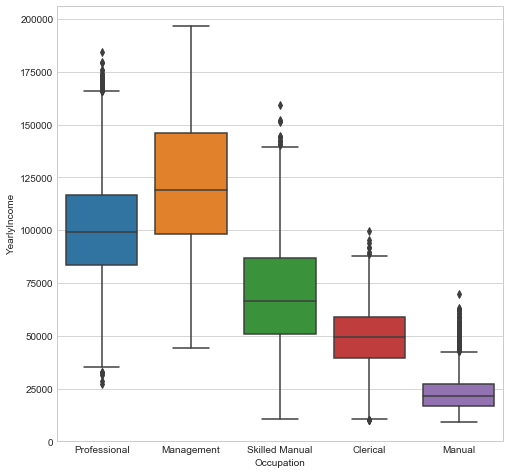

In [60]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.boxplot('Occupation', 'YearlyIncome', data=trainData )
plt.xlabel('Occupation')
plt.ylabel('YearlyIncome')
plt.show()

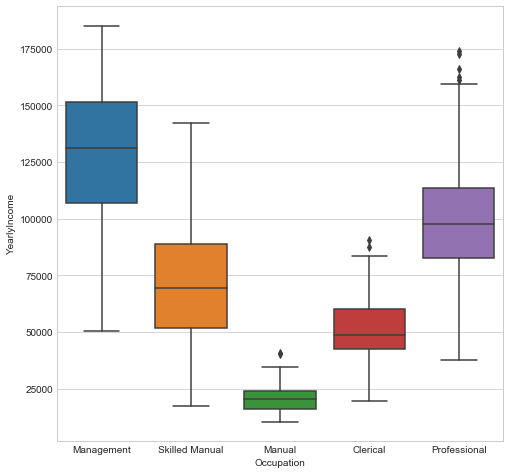

In [52]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.boxplot('Occupation', 'YearlyIncome', data=testData )
plt.xlabel('Occupation')
plt.ylabel('YearlyIncome')
plt.show()

### The code block below extracts the age of each client using 01/01/1998 as the refrence date

In [107]:
def date_split(df, delimiter):
    vals = []
    for i, row in enumerate(df):
        vals.append( row.split(delimiter) )
    return vals

def agesTrain(dates, year = 1998, month = 1, day = 1):
    lst = []
    for date in dates:
        for i, vals in enumerate(date):
            if i == 0:
                yr =int(vals)
            elif i == 1:
                moth = int(vals)
            else: dy = int(vals)
        age = year - yr
        if moth > month:
            lst.append(age)
        elif  moth == month and dy >= day:
            lst.append(age)
        else: lst.append(age-1)
    return lst

def agesTest(dates, year = 1998, month = 1, day = 1):
    lst = []
    for date in dates:
        for i, vals in enumerate(date):
            if i == 0:
                dy = int(vals)
            elif i == 1:
                moth = int(vals)
            else: yr =int(vals)
        age = year - yr
        if moth > month:
            lst.append(age)
        elif  moth == month and dy >= day:
            lst.append(age)
        else: lst.append(age-1)
    return lst

splitDate = date_split(trainData['BirthDate'].values, delimiter = '-')
trainData['Age'] = agesTrain(splitDate)

splitDate = date_split(testData['BirthDate'].values, delimiter = '/')
testData['Age'] = agesTest(splitDate)

testData.drop(columns=['BirthDate'], inplace = True)
trainData.drop(columns=['BirthDate'], inplace = True)

In [108]:
trainData.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,32
1,11001,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,33
2,11002,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,33
3,11003,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,30
4,11004,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,30


In [109]:
testData.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,United States,Bachelors,Management,F,S,0,2,0,5,86931,53
1,29135,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,34
2,12156,United States,Graduate Degree,Management,F,M,1,2,0,4,103985,64
3,13749,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,40
4,27780,France,High School,Manual,F,M,1,1,2,2,21876,33


In [110]:
trainData.shape, testData.shape

((16404, 14), (500, 12))

In [84]:
sub_dataSet = trainData[['Age','AveMonthSpend','Gender']]
F_less_25 = sub_dataSet[  (sub_dataSet['Gender'] == str('F')) &  (sub_dataSet['Age'] < 25)]
F_blw_25_45 = sub_dataSet[  (sub_dataSet['Gender'] == str('F')) &  ( (sub_dataSet['Age'] >= 25) & (sub_dataSet['Age'] < 45) )]
F_blw_45_55 = sub_dataSet[  (sub_dataSet['Gender'] == str('F')) &  ( (sub_dataSet['Age'] >= 45) & (sub_dataSet['Age'] < 55) )]
F_higher_55 = sub_dataSet[  (sub_dataSet['Gender'] == str('F')) &  (sub_dataSet['Age'] > 55)]

M_less_25 = sub_dataSet[  (sub_dataSet['Gender'] == str('M')) &  (sub_dataSet['Age'] < 25)]
M_blw_25_45 = sub_dataSet[  (sub_dataSet['Gender'] == str('M')) &  ( (sub_dataSet['Age'] >= 25) & (sub_dataSet['Age'] < 45) )]
M_blw_45_55 = sub_dataSet[  (sub_dataSet['Gender'] == str('M')) &  ( (sub_dataSet['Age'] >= 45) & (sub_dataSet['Age'] < 55) )]
M_higher_55 = sub_dataSet[  (sub_dataSet['Gender'] == str('M')) &  (sub_dataSet['Age'] > 55)]


In [85]:
F_age_data = [F_less_25, F_blw_25_45,F_blw_45_55, F_higher_55]
M_age_data =  [M_less_25, M_blw_25_45, M_blw_45_55, M_higher_55]

### Study the scatterplot for *Male Ages vs Average Spending* and *Female Ages vs Average Spending* below to answer Question 8

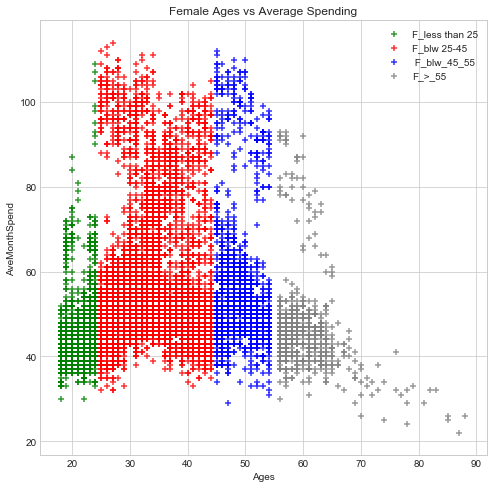

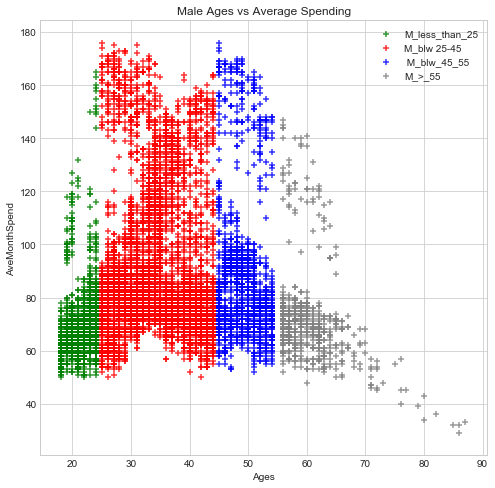

In [86]:
F_labels = ['F_less than 25', 'F_blw 25-45',' F_blw_45_55', 'F_>_55']
M_labels = ['M_less_than_25', 'M_blw 25-45',' M_blw_45_55', 'M_>_55']
M_title = 'Male Ages vs Average Spending'
F_title = 'Female Ages vs Average Spending'

def scatter_plot(ages, labels, title, shape = '+', col_y = 'AveMonthSpend', ):
    colors =['green', 'red','blue','gray']
    sns.set_style('whitegrid')
    plt.figure(figsize=(8,8))
    for i, age in enumerate(ages):
        sns.regplot('Age', col_y, data = age, marker = shape, label = labels[i],
                    color = colors[i], fit_reg = False )
    plt.title(title)
    plt.xlabel('Ages')
    plt.ylabel('AveMonthSpend')
    plt.legend()
    plt.show()

scatter_plot(F_age_data, F_labels, F_title)
scatter_plot(M_age_data, M_labels, M_title)
    

### Study the boxplot below  to answer Question 9

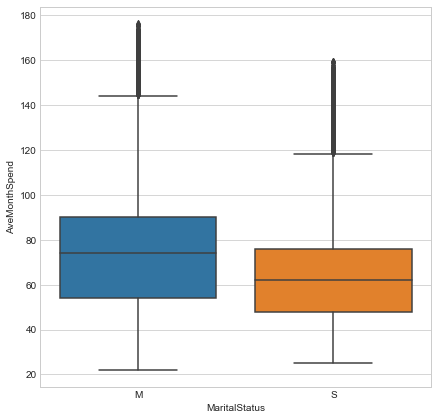

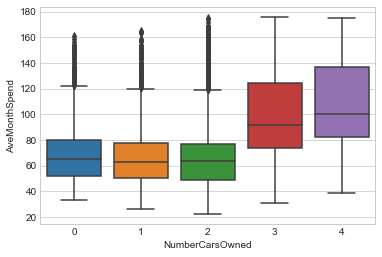

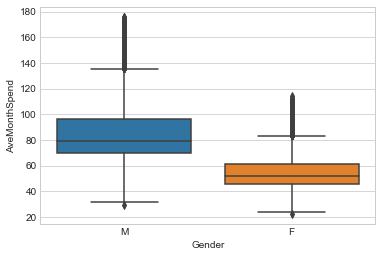

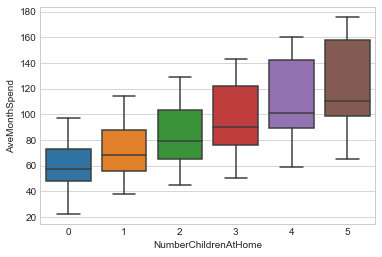

In [87]:
values = ['MaritalStatus','NumberCarsOwned', 'Gender', 'NumberChildrenAtHome' ]
def boxplots(values, col_y = 'AveMonthSpend', data = dataSet):  
    plt.figure(figsize = (7,7))
    sns.set_style('whitegrid')
    for cat in values:
        sns.boxplot(cat, col_y, data=data)
        plt.xlabel(cat)
        plt.ylabel(col_y)
        plt.show()
boxplots(values)

### Study the boxplots and barcharts below  to answer Question 10

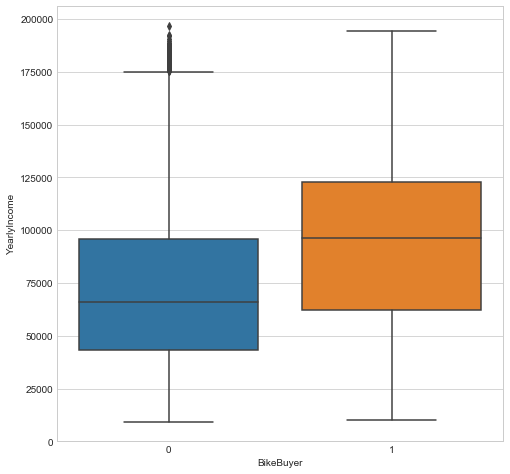

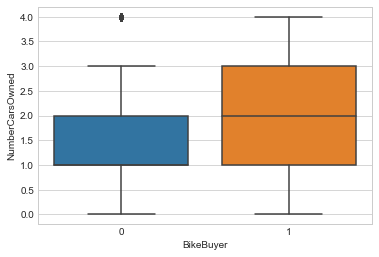

In [72]:
sub_data = ['YearlyIncome', 'NumberCarsOwned']
def boxes(data, col_x ='BikeBuyer' ):
    plt.figure(figsize=(8,8))
    sns.set_style('whitegrid')
    for df in data:
        sns.boxplot(col_x, df, data=dataSet )
        plt.xlabel(col_x)
        plt.ylabel(df)
        plt.show()
boxes(sub_data)

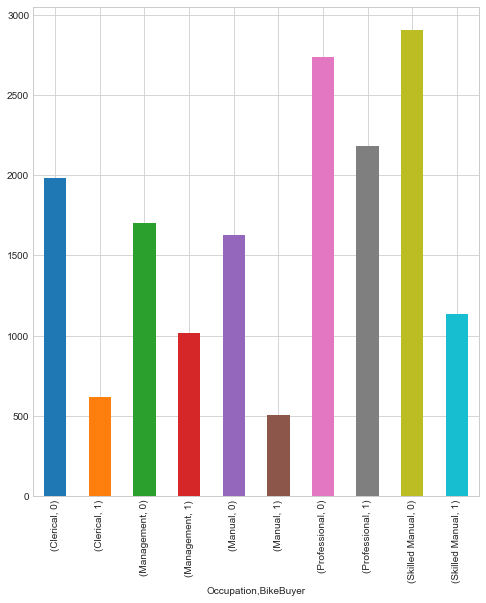

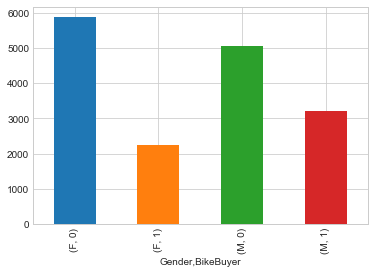

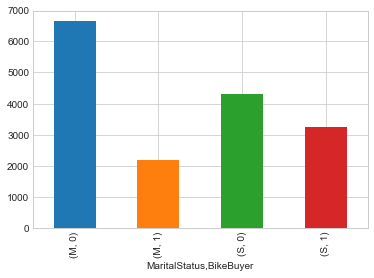

In [73]:
sub_data2 = dataSet[['Occupation','BikeBuyer']].groupby('Occupation')['BikeBuyer'].value_counts()
sub_data3 = dataSet[['Gender','BikeBuyer']].groupby('Gender')['BikeBuyer'].value_counts()
sub_data4 = dataSet[['MaritalStatus','BikeBuyer']].groupby('MaritalStatus')['BikeBuyer'].value_counts()
data = [sub_data2, sub_data3, sub_data4]
def little_boxes(data):
    plt.figure(figsize = (8,9))
    for df in data:  
        df.plot(kind='bar')
        plt.show()
little_boxes(data)

## Data Transformation, OneHotEncoding, Feature Selection and Dimensionality Reduction

In [111]:
trainData['log_YearlyIncome'] = trainData[ ['YearlyIncome']].applymap(math.log)
testData['log_YearlyIncome'] = testData[ ['YearlyIncome']].applymap(math.log)
trainData2 = trainData.drop(columns = ['YearlyIncome', 'BikeBuyer','AveMonthSpend'], inplace = False)
testData = testData.drop(columns = ['YearlyIncome'])

In [115]:
regression_labels = trainData['AveMonthSpend']
classification_labels = trainData['BikeBuyer']

In [116]:
regression_labels.shape, classification_labels.shape, trainData2.shape, testData.shape

((16404,), (16404,), (16404, 12), (500, 12))

In [113]:
trainData2.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Age,log_YearlyIncome
0,11000,Australia,Bachelors,Professional,M,M,1,0,0,2,32,11.834625
1,11001,Australia,Bachelors,Professional,M,S,0,1,3,3,33,11.524271
2,11002,Australia,Bachelors,Professional,M,M,1,1,3,3,33,11.428946
3,11003,Australia,Bachelors,Professional,F,S,0,1,0,0,30,11.370071
4,11004,Australia,Bachelors,Professional,F,S,1,4,5,5,30,11.437889


In [114]:
testData.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Age,log_YearlyIncome
0,18988,United States,Bachelors,Management,F,S,0,2,0,5,53,11.372870
1,29135,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,34,11.514175
2,12156,United States,Graduate Degree,Management,F,M,1,2,0,4,64,11.552002
3,13749,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,40,11.753209
4,27780,France,High School,Manual,F,M,1,1,2,2,33,9.993145


In [123]:
categories = ['Education','Occupation','Gender','MaritalStatus']

def encode_string(cat_feature, train, test):
    ## First encode the strings to numeric categories
    f_train = train[cat_feature]
    f_test = test[cat_feature]
    enc = preprocessing.LabelEncoder().fit(f_train)
    f_train = enc.transform(f_train)
    f_test = enc.transform(f_test)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(f_train.reshape(-1,1))
    return (encoded.transform(f_train.reshape(-1,1)).toarray(), encoded.transform(f_test.reshape(-1,1)).toarray())

trainFeatures, testFeatures = encode_string('CountryRegionName', trainData2, testData)

for col in categories:
    temp_train, temp_test = encode_string(col, trainData2, testData)
    trainFeatures = np.concatenate([trainFeatures, temp_train], axis = 1)
    testFeatures = np.concatenate([testFeatures, temp_test], axis = 1)
    
print('Train:{}\tTest:{}\n'.format(trainFeatures.shape, testFeatures.shape))
print('Train:{}\nTest:{}'.format(trainFeatures[:2, :],testFeatures[:2, :]))  

Train:(16404, 20)	Test:(500, 20)

Train:[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]]
Test:[[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.]]


In [124]:
cols =['HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age','log_YearlyIncome']
trainFeatures = np.concatenate([ trainFeatures, np.array(trainData2[cols])], axis = 1)
testFeatures = np.concatenate([ testFeatures, np.array(testData[cols])], axis = 1)
print('Train:{}\tTest:{}\n'.format(trainFeatures.shape, testFeatures.shape))
print('Train:{}\nTest:{}'.format(trainFeatures[:1, :],testFeatures[:1, :]))  

Train:(16404, 26)	Test:(500, 26)

Train:[[ 1.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          1.
   1.          0.          1.          0.          0.          2.
  32.         11.83462483]]
Test:[[ 0.          0.          0.          0.          0.          1.
   1.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          1.          0.
   0.          1.          0.          2.          0.          5.
  53.         11.37286998]]


In [125]:
scaler = preprocessing.StandardScaler().fit(trainFeatures[:,20:])
trainFeatures[:,20:] = scaler.transform(trainFeatures[:,20:])
testFeatures[:,20:] = scaler.transform(testFeatures[:,20:])

In [126]:
print('Train:{}\tTest:{}\n'.format(trainFeatures.shape, testFeatures.shape))
print('Train:{}\nTest:{}'.format(trainFeatures[:1, :],testFeatures[:1, :])) 

Train:(16404, 26)	Test:(500, 26)

Train:[[ 1.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          1.
   1.          0.          0.69530633 -1.31661475 -0.6545231  -0.00268156
  -0.39550754  1.17195383]]
Test:[[ 0.          0.          0.          0.          0.          1.
   1.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          1.          0.
   0.          1.         -1.43821501  0.43915701 -0.6545231   1.78062669
   1.47269329  0.43307957]]


In [128]:
## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
trainFeature_reduced = sel.fit_transform(trainFeatures)
testFeature_reduced = sel.fit_transform(testFeatures)
## Print the support and shape for the transformed features
print(sel.get_support())
print(trainFeature_reduced.shape)
print(testFeature_reduced.shape)

[False False False False False  True  True False False  True False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True]
(16404, 15)
(500, 15)


In [ ]:
pd.DataFrame(trainFeature_reduced).to_csv('train.csv', index=False)
pd.DataFrame(testFeature_reduced).to_csv('test.csv', index=False)
pd.DataFrame(regression_labels).to_csv('regression_labels.csv', index=False)
pd.DataFrame(classification_labels).to_csv('classification_labels.csv', index=False)